In [1]:
%cd ..

/Users/crupley/gal/hoodie-development


In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle

from code.featurize import featurizer

In [6]:
with open('features.pkl', 'rb') as f:
    feat = pickle.load(f)

In [3]:
with open('featuresdf.pkl', 'rb') as f:
    fdf = pickle.load(f)
print fdf.shape
fdf.head()

(7334, 11)


lat         lon  taxable_value   grocery  restaurant    retail  \
0  37.750067 -122.441075       0.288994 -0.640949   -0.561362 -0.582297   
1  37.750196 -122.438933       0.336486 -0.576766   -0.465886 -0.515304   
2  37.756794 -122.436270       0.350392 -0.131126   -0.396314 -0.227381   
3  37.753529 -122.437050       0.327277 -0.298948   -0.286766 -0.356888   
4  37.755758 -122.433400       0.355234  0.018376   -0.470065 -0.123353   

    ncrimes      sgnf  avg_hh_size  population  walkscore  
0 -0.509058  0.477959    -0.017894   -0.102338  -0.025533  
1 -0.509038  1.060608     0.253293    0.043369   0.146457  
2 -0.313369  0.276664     0.244508    0.413731   0.701471  
3 -0.456736  0.945703     0.372523    0.260021   0.594762  
4 -0.345027  0.674973     0.360681    0.530529   0.622791

In [33]:
feat.allfeatures

['taxable_value',
 'grocery',
 'restaurant',
 'retail',
 'ncrimes',
 'sgnf',
 'avg_hh_size',
 'population',
 'walkscore']

# Data layer

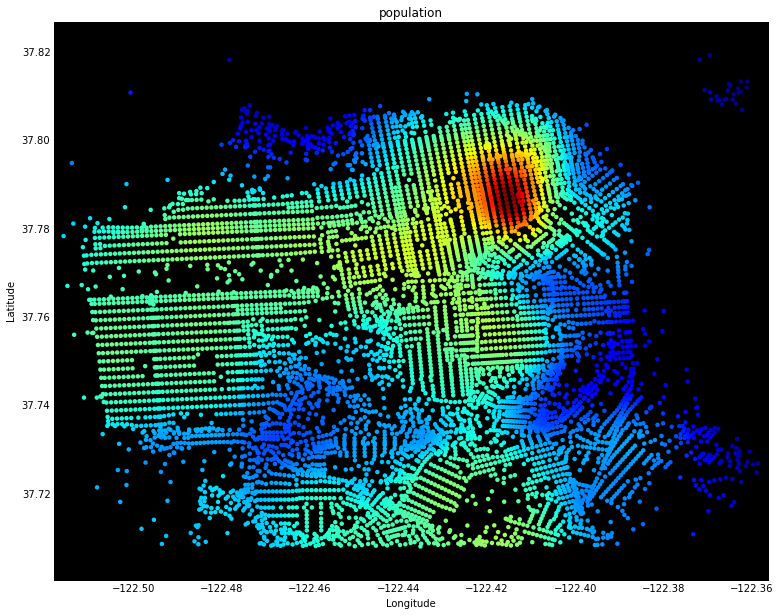

In [37]:
feat.plot(['population'])
fig = plt.gcf()
fig.set_size_inches(16,10)
fig.delaxes(fig.axes[1])
plt.savefig('images/datapop.png')

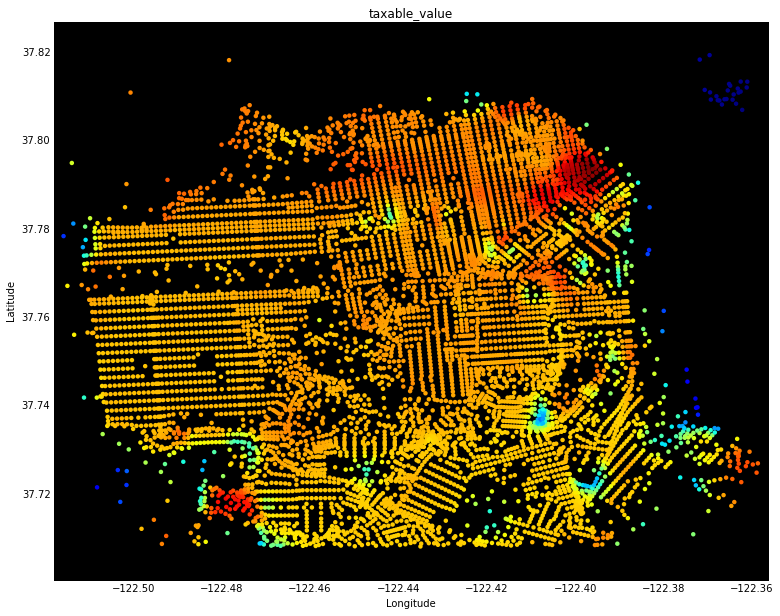

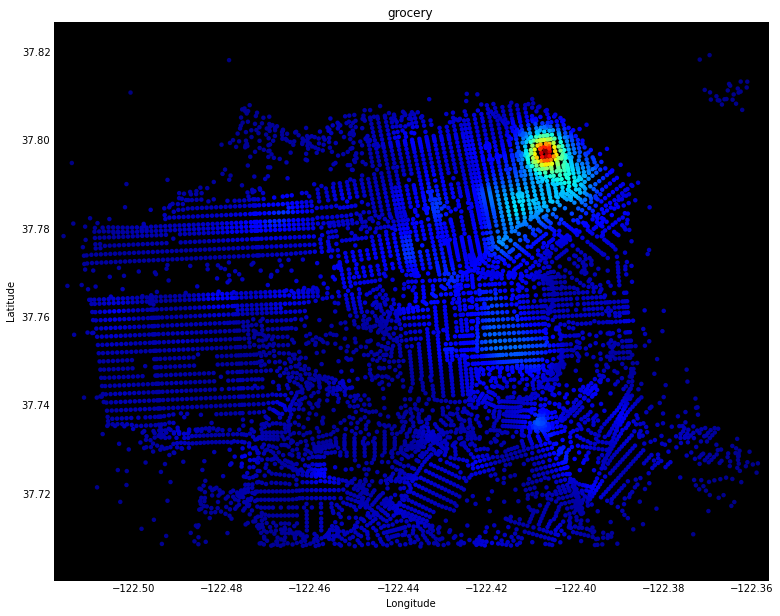

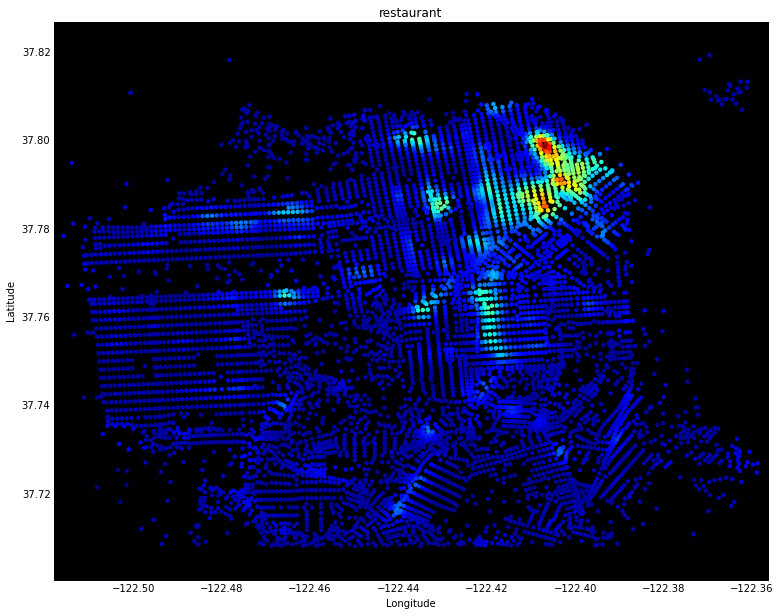

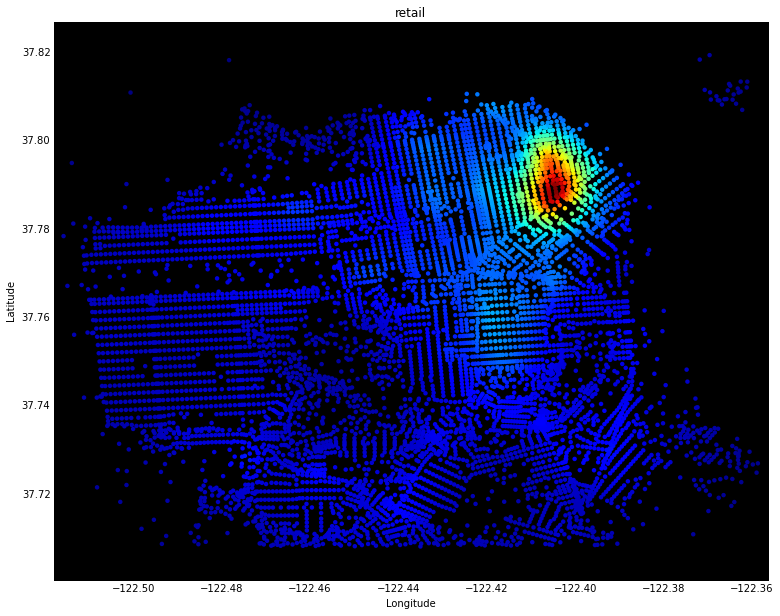

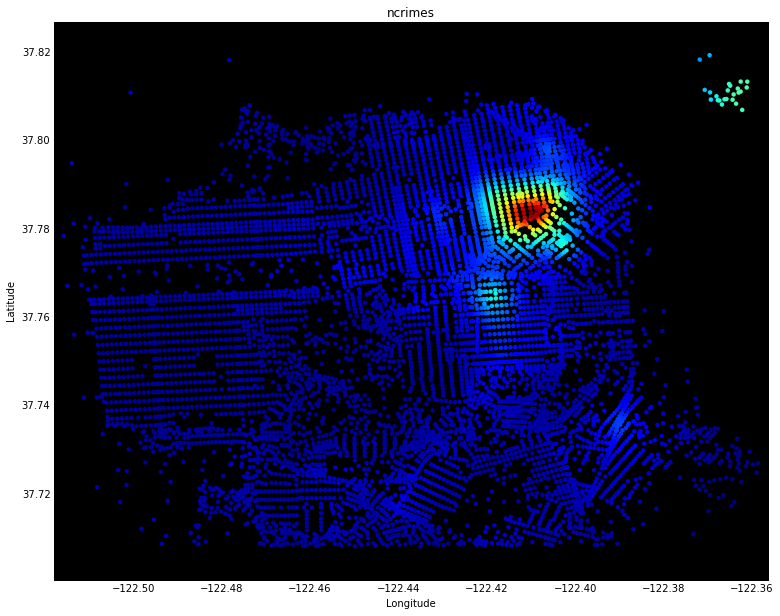

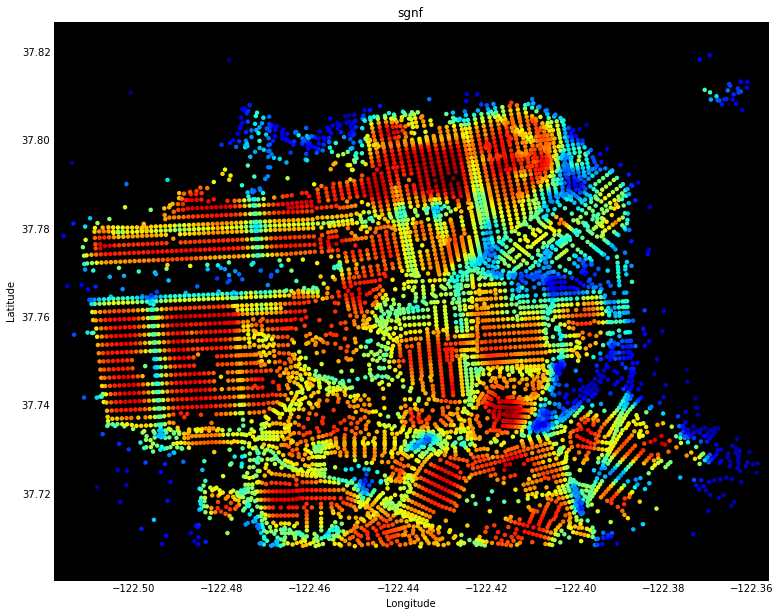

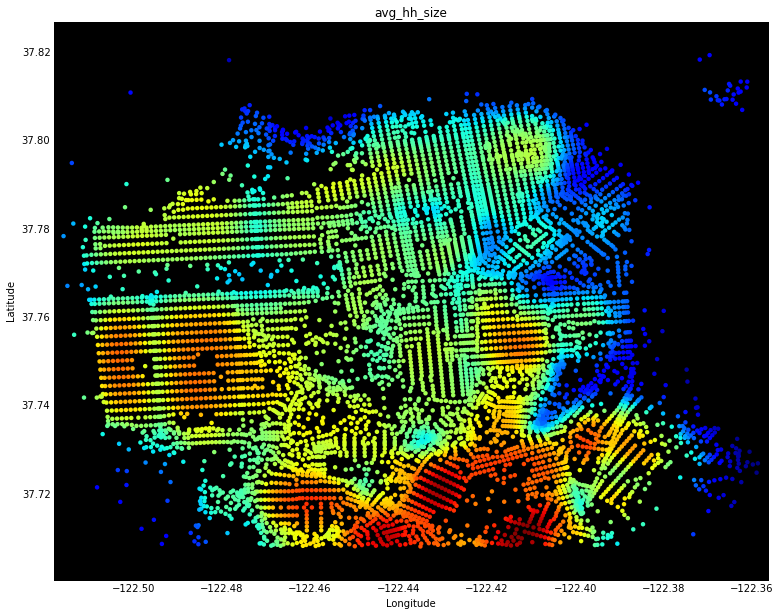

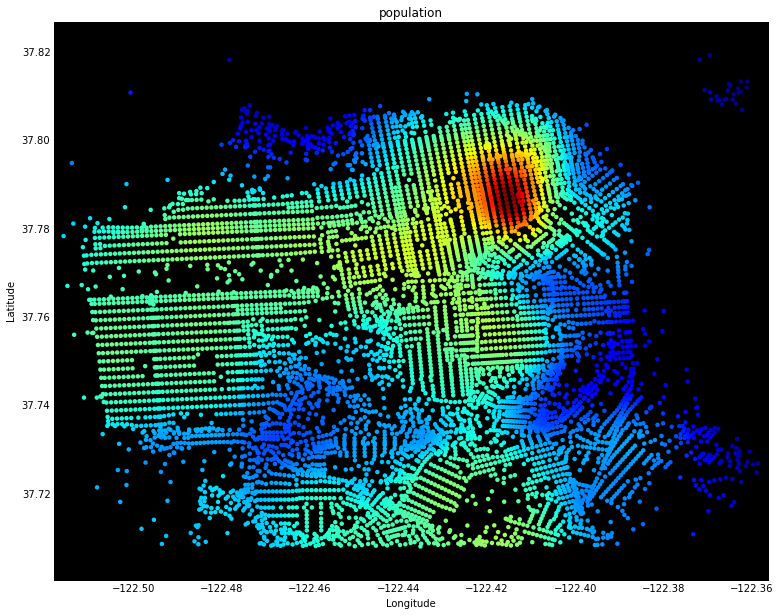

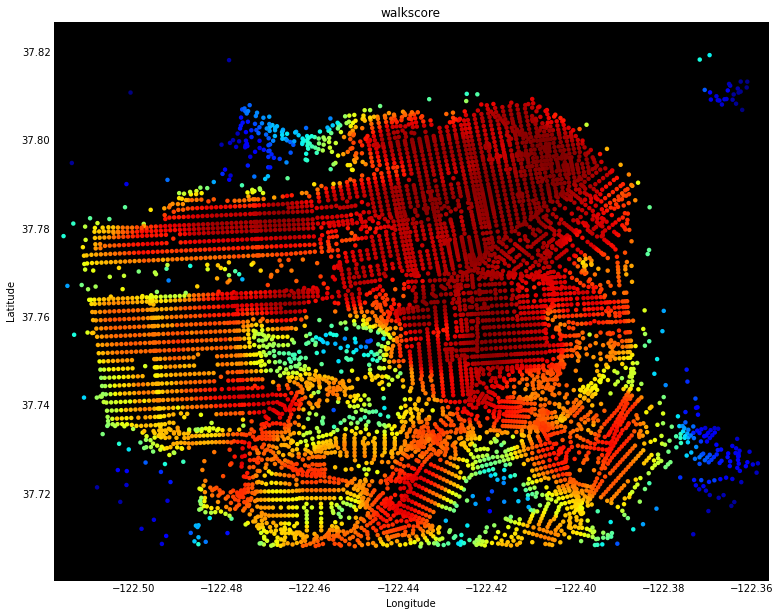

In [38]:
for m in feat.allfeatures:
    feat.plot([m])
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    fig.delaxes(fig.axes[1])
    fn = 'images/data' + m +'.png'
    plt.savefig(fn)

# graph edges

In [35]:
with open('edges.pkl', 'rb') as f:
    edges = pickle.load(f)

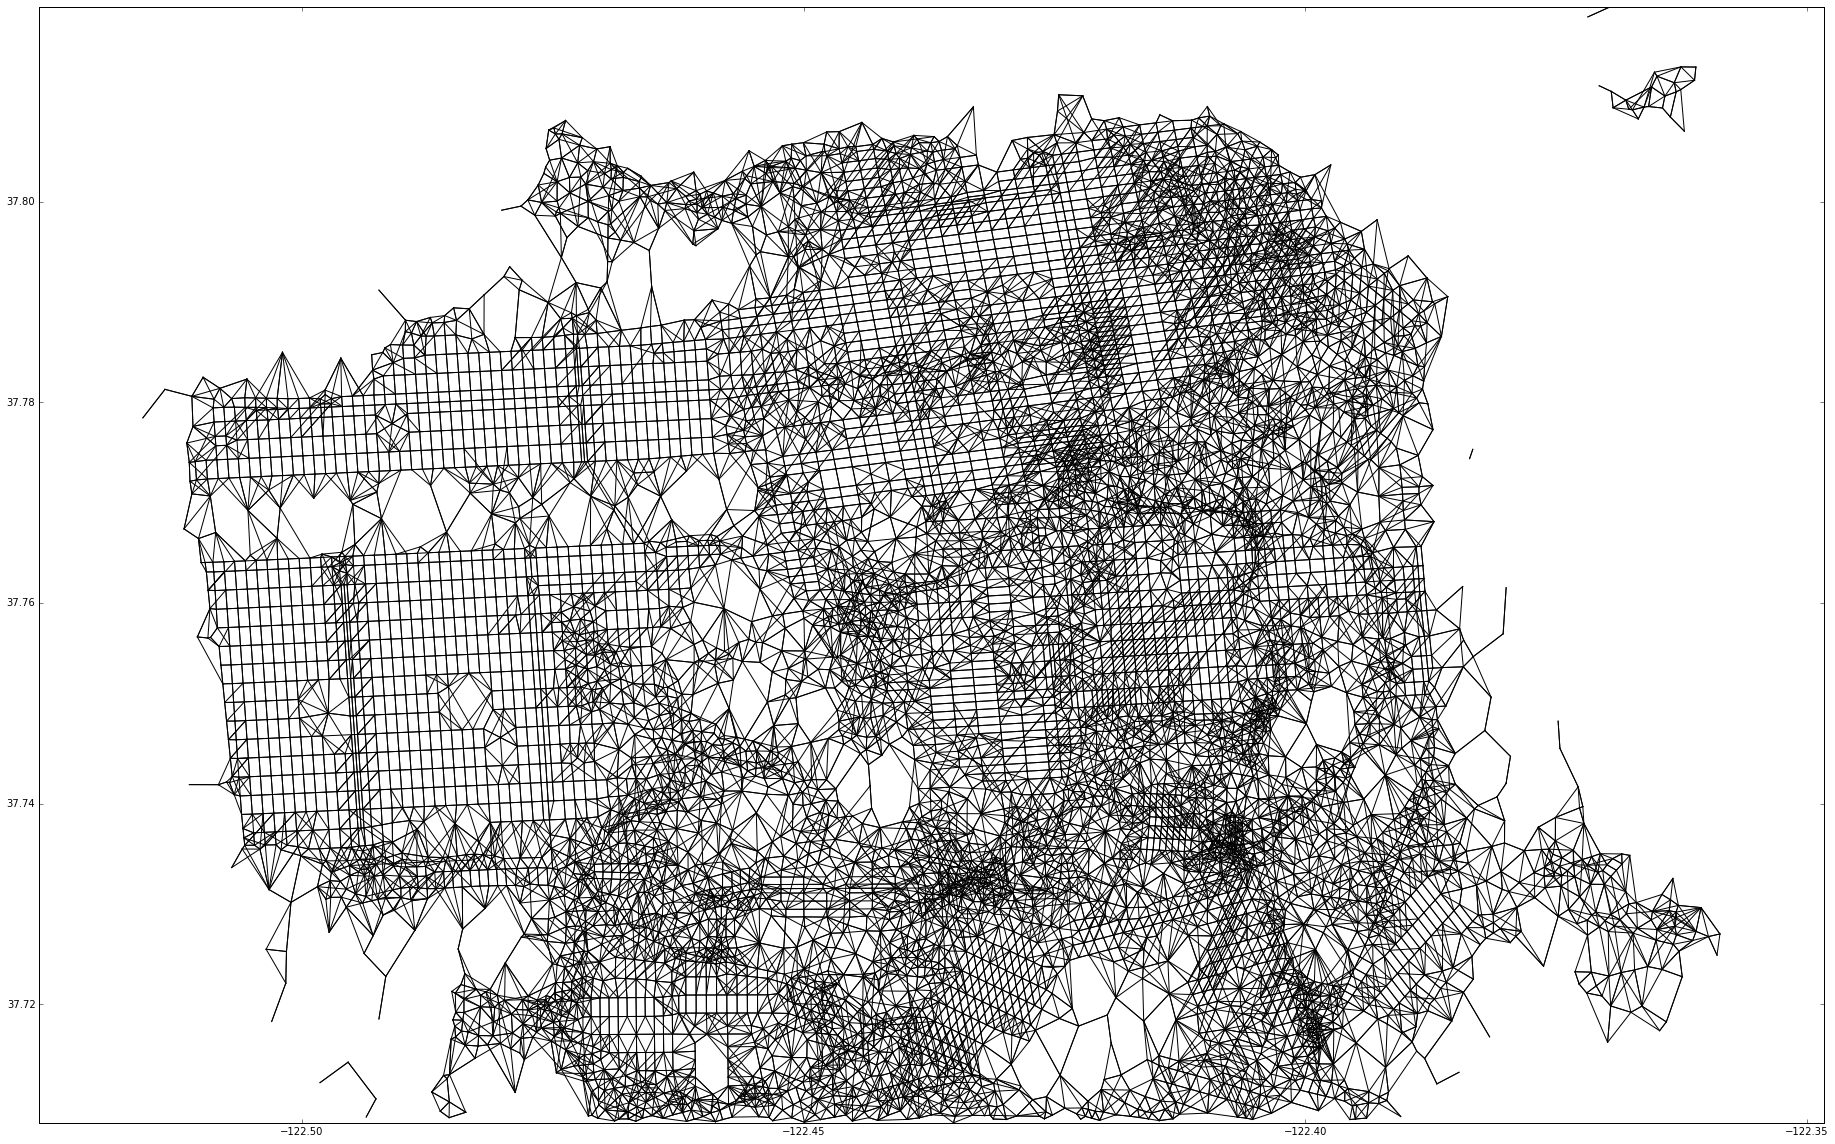

In [40]:
# fdf.plot(kind='scatter', x = 'lon', y = 'lat')

for idx in edges.index:
    node1 = edges.ix[idx].node1
    node2 = edges.ix[idx].node2

    plt.plot([fdf.ix[node1].lon, fdf.ix[node2].lon],
             [fdf.ix[node1].lat, fdf.ix[node2].lat], c='black')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)

fig = plt.gcf()
fig.set_size_inches(32,20)

plt.savefig('images/plotedges.png')